# IPL Male Analysis

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import glob
import csv

In [2]:
# setting display options for output

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set_theme()

## 1. Reading and Understanding the data

In [3]:
# function definitions

def get_match_date(filename):
    with open(filename) as file_obj:
        reader_obj = csv.DictReader(file_obj)
        heading = next(file_obj)
        
        for i,row in enumerate(reader_obj,1):
            if i==5:
                return pd.to_datetime(row['6'])

In [79]:
# reading csv files and storing in df
file_list = glob.glob("*.csv")
file_list = list(map(lambda x : int(x[:-4]),file_list))
file_list.sort()

# fetching match date from the same file using another way
main_dataframe = pd.read_csv(str(file_list[0])+".csv",skiprows=70,on_bad_lines='skip',header=None)
main_dataframe['match_date'] = get_match_date(str(file_list[0])+".csv")

# assigning match number
main_dataframe['match_number'] = 1

# merging next files' dataframes with 1st df 
for j in range(1,len(file_list)):
    with open(str(file_list[j])+".csv") as file_obj:
            reader_obj = csv.DictReader(file_obj)
            heading = next(file_obj)

            for i,row in enumerate(reader_obj,1):
                if i==5:
                    date_data = pd.to_datetime(row['6'])
                if row['info']=='ball':
                    data = pd.read_csv(str(file_list[j])+".csv",skiprows=i+1,on_bad_lines='skip',header=None)
                    data['match_date'] = date_data
                    data['match_number'] = j+1
                    main_dataframe = pd.concat([main_dataframe,data])
                    break
                    
# assigning column name
main_dataframe.columns=['type_of_data','innings','over_and_ball','batting_team','batsman','non_striker','bowler','runs_off_bat','extras','wides','no_balls','byes','leg_byes','penalty','kind_of_wicket','dismissed_player','match_date','match_number']

In [81]:
# check if data fetched properly

main_dataframe.head()

,type_of_data,innings,over_and_ball,batting_team,batsman,non_striker,bowler,runs_off_bat,extras,wides,no_balls,byes,leg_byes,penalty,kind_of_wicket,dismissed_player,match_date,match_number
0,ball,1,0.1,Kolkata Knight Riders,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18,1
1,ball,1,0.2,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,1
2,ball,1,0.3,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,1
3,ball,1,0.4,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,1
4,ball,1,0.5,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18,1


In [82]:
# reading csv files and storing in df

# file_list = glob.glob("*.csv")
#file_list = list(map(lambda x : int(x[:-4]),file_list))
#file_list.sort()
#main_dataframe = pd.read_csv(str(file_list[0])+".csv",skiprows=70,on_bad_lines='skip',header=None)

# fetching match date from the same file using another way
#main_dataframe['match_date'] = get_match_date(str(file_list[0])+".csv")

# assigning match number
#main_dataframe['match_number'] = 1

# merging next files' dataframes with 1st df 
#for i in range(1,len(file_list)):
 #   data = pd.read_csv(str(file_list[i])+".csv",skiprows=70,on_bad_lines='skip',header=None)
  #  data['match_date'] = get_match_date(str(file_list[i])+".csv")
   # data['match_number'] = i+1
    #main_dataframe = pd.concat([main_dataframe,data])

# assigning column name
#main_dataframe.columns=['type_of_data','innings','over_and_ball','batting_team','batsman','non_striker','bowler','runs_off_bat','extras','wides','no_balls','byes','leg_byes','penalty','kind_of_wicket','dismissed_player','match_date','match_number']

In [84]:
# check if data fetched properly

main_dataframe.tail()

,type_of_data,innings,over_and_ball,batting_team,batsman,non_striker,bowler,runs_off_bat,extras,wides,no_balls,byes,leg_byes,penalty,kind_of_wicket,dismissed_player,match_date,match_number
228,ball,2,17.3,Gujarat Titans,DA Miller,Shubman Gill,R Ashwin,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-29,950
229,ball,2,17.4,Gujarat Titans,Shubman Gill,DA Miller,R Ashwin,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-29,950
230,ball,2,17.5,Gujarat Titans,Shubman Gill,DA Miller,R Ashwin,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-29,950
231,ball,2,17.6,Gujarat Titans,DA Miller,Shubman Gill,R Ashwin,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-29,950
232,ball,2,18.1,Gujarat Titans,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-29,950


## 2. Cleaning unwanted data and null values treatment

In [85]:
# check if we have got any info type of data 

main_dataframe.type_of_data.value_counts()

ball    225954
Name: type_of_data, dtype: int64

In [88]:
# removing unnecessary column

main_dataframe=main_dataframe.drop('type_of_data',axis=1)

In [89]:
# check columns, no. of rows, datatypes and missing values

main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225954 entries, 0 to 232
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   innings           225954 non-null  int64         
 1   over_and_ball     225954 non-null  float64       
 2   batting_team      225954 non-null  object        
 3   batsman           225954 non-null  object        
 4   non_striker       225954 non-null  object        
 5   bowler            225954 non-null  object        
 6   runs_off_bat      225954 non-null  int64         
 7   extras            225954 non-null  int64         
 8   wides             7026 non-null    float64       
 9   no_balls          918 non-null     float64       
 10  byes              583 non-null     float64       
 11  leg_byes          3531 non-null    float64       
 12  penalty           2 non-null       float64       
 13  kind_of_wicket    11151 non-null   object        
 14  dismiss

In [90]:
# treat missing values for different types of balls

main_dataframe[['wides','no_balls','byes','leg_byes','penalty']]=main_dataframe[['wides','no_balls','byes','leg_byes','penalty']].fillna(0)

In [91]:
# treat missing values for wicket

main_dataframe[['kind_of_wicket','dismissed_player']]=main_dataframe[['kind_of_wicket','dismissed_player']].fillna("No Wicket")

In [92]:
# check columns, no. of rows, datatypes and missing values

main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225954 entries, 0 to 232
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   innings           225954 non-null  int64         
 1   over_and_ball     225954 non-null  float64       
 2   batting_team      225954 non-null  object        
 3   batsman           225954 non-null  object        
 4   non_striker       225954 non-null  object        
 5   bowler            225954 non-null  object        
 6   runs_off_bat      225954 non-null  int64         
 7   extras            225954 non-null  int64         
 8   wides             225954 non-null  float64       
 9   no_balls          225954 non-null  float64       
 10  byes              225954 non-null  float64       
 11  leg_byes          225954 non-null  float64       
 12  penalty           225954 non-null  float64       
 13  kind_of_wicket    225954 non-null  object        
 14  dismiss

In [93]:
# check values for innings

main_dataframe.innings.value_counts()

1    116883
2    108910
3        77
4        72
5         8
6         4
Name: innings, dtype: int64

In [94]:
# change datatype for innings

main_dataframe.innings=main_dataframe.innings.apply(lambda x: int(x))

In [95]:
# check unique values for over and ball

main_dataframe.over_and_ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,
        8.6,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4,
       10.5, 10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3,
       12.4, 12.5, 12.6, 12.7, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 15.1, 15.2, 15.3, 15.4, 15.5,
       15.6, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4,
       17.5, 17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3,
       19.4, 19.5, 19.6,  2.7,  6.7,  6.8,  8.7,  8.8,  9.7,  1.7, 12.8,
        5.7,  5.8, 13.7,  7.7,  4.7, 15.7, 13.8,  1.8, 16.7, 11.7, 11.8,
       11.9, 19.7,  3.8, 17.7, 18.7,  0.8, 10.7, 10

In [96]:
# change datatype for over_and_ball

main_dataframe.over_and_ball=main_dataframe.over_and_ball.apply(lambda x: float(x))

In [97]:
# check unique values for team names

main_dataframe.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [98]:
# fix wrong team name

main_dataframe.batting_team=main_dataframe.batting_team.apply(lambda x : "Rising Pune Supergiants" if x=="Rising Pune Supergiant" else x)

In [99]:
# check team names again

main_dataframe.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [100]:
# create new column to indetify weather a ball had wicket or not

main_dataframe['wickets']=(main_dataframe['kind_of_wicket']!='No Wicket').map({True:1,False:0})

In [101]:
# create new column to indetify weather a ball was 6 or not

main_dataframe['six']=(main_dataframe['runs_off_bat']==6).map({True:1,False:0})

In [102]:
# create new column to indetify weather a ball was 4 or not

main_dataframe['four']=(main_dataframe['runs_off_bat']==4).map({True:1,False:0})

In [103]:
# separating column over_and_ball to create 2 new columns

main_dataframe['over']=main_dataframe['over_and_ball'].apply(lambda x: math.ceil(x))

In [104]:
# separating column over_and_ball to create 2 new columns

main_dataframe['ball']=main_dataframe['over_and_ball'].apply(lambda x: int((x*10)%10))

## 3. EDA

### 3.1.1 Most runs by a batsman in IPL

In [111]:
# get top 10 run scorers

most_runs_batsman=main_dataframe[['batsman','runs_off_bat']].groupby(["batsman"], as_index=False).sum(numeric_only=True).sort_values(by='runs_off_bat',ascending=False).head(10)

most_runs_batsman=most_runs_batsman.reset_index(drop=True)

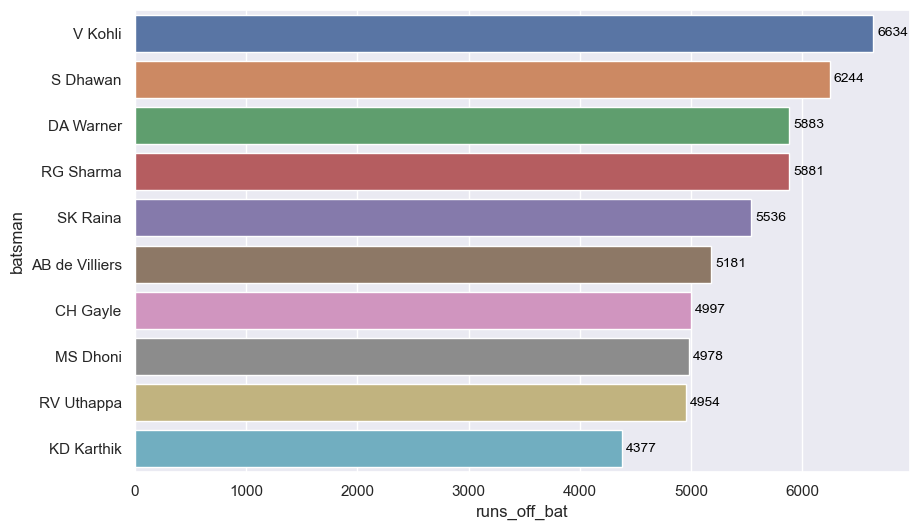

In [112]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=most_runs_batsman,x="runs_off_bat",y="batsman",orient="h")
ax.bar_label(ax.containers[0],label_type='edge',color='black', fontsize=10, padding=3)
plt.show()

### 3.1.2. Most 6s by a batsman in IPL

In [113]:
most_sixes_batsman=main_dataframe[["batsman","six"]].groupby("batsman",as_index=False).sum(numeric_only=True).sort_values(by="six",ascending=False).head(10).reset_index(drop=True)

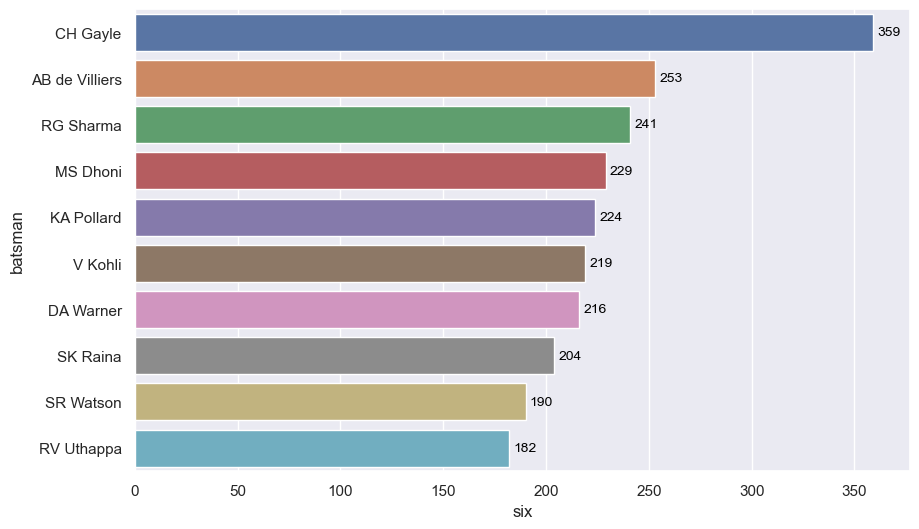

In [114]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=most_sixes_batsman,x="six",y="batsman",orient="h")
ax.bar_label(ax.containers[0],label_type='edge',color='black', fontsize=10, padding=3)
plt.show()

### 3.1.3. Most 4s by a batsman in IPL

In [115]:
most_fours_batsman=main_dataframe[["batsman","four"]].groupby("batsman",as_index=False).sum(numeric_only=True).sort_values(by="four",ascending=False).head(10).reset_index(drop=True)

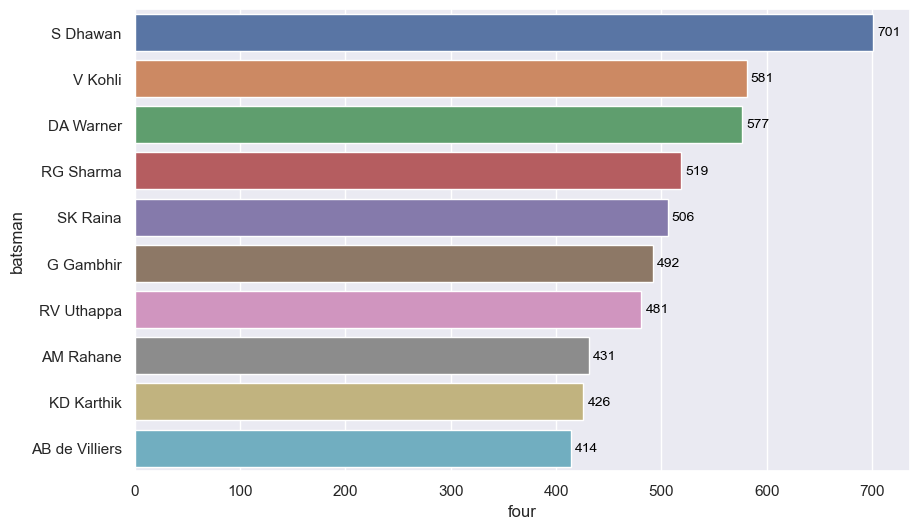

In [116]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=most_fours_batsman,x="four",y="batsman",orient="h")
ax.bar_label(ax.containers[0],label_type='edge',color='black', fontsize=10, padding=3)
plt.show()

### 3.1.4. Highest strike rates for batsmen having 4000 runs 

In [139]:
# adding a column to identify if the ball was faced by batsman or not to calculate strike rate 

main_dataframe['ball_faced_or_not']=main_dataframe[['extras','no_balls']].apply(lambda x : 1 if (x.extras==0) or (x.extras>1 and x.no_balls>1) else 0,axis=1)

In [148]:
highest_strike_rate_4000=main_dataframe[['batsman','runs_off_bat','ball_faced_or_not']].groupby(["batsman"], as_index=False).sum(numeric_only=True).sort_values(by='runs_off_bat',ascending=False)

highest_strike_rate_4000=highest_strike_rate_4000[highest_strike_rate_4000.runs_off_bat>4000]

highest_strike_rate_4000['sr']=highest_strike_rate_4000[['runs_off_bat','ball_faced_or_not']].apply(lambda x : (x.runs_off_bat/x.ball_faced_or_not)*100,axis=1)

highest_strike_rate_4000=highest_strike_rate_4000.sort_values(by="sr",ascending=False)

highest_strike_rate_4000=highest_strike_rate_4000.reset_index(drop=True)

In [149]:
highest_strike_rate_4000

,batsman,runs_off_bat,ball_faced_or_not,sr
0,AB de Villiers,5181,3344,154.934211
1,CH Gayle,4997,3256,153.470516
2,DA Warner,5883,4086,143.979442
3,SK Raina,5536,3967,139.551298
4,MS Dhoni,4978,3589,138.701588
5,KD Karthik,4377,3230,135.510836
6,RV Uthappa,4954,3709,133.566999
7,RG Sharma,5881,4463,131.772350
8,V Kohli,6634,5069,130.873940
9,AT Rayudu,4190,3235,129.520866


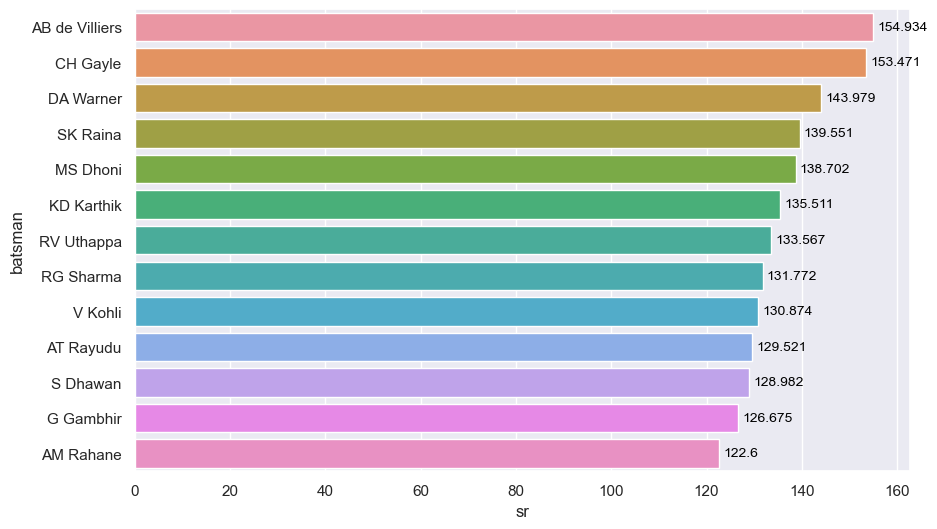

In [150]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=highest_strike_rate_4000,x="sr",y="batsman",orient="h")
ax.bar_label(ax.containers[0],label_type='edge',color='black', fontsize=10, padding=3)
plt.show()

### 3.2.1 Most wickets by a bowler in IPL

In [151]:
main_dataframe.columns

Index(['innings', 'over_and_ball', 'batting_team', 'batsman', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'no_balls', 'byes',
       'leg_byes', 'penalty', 'kind_of_wicket', 'dismissed_player',
       'match_date', 'match_number', 'wickets', 'six', 'four', 'over', 'ball',
       'ball_faced_or_not'],
      dtype='object')

In [153]:
most_wickets_bowler=main_dataframe[["bowler","wickets"]].groupby("bowler",as_index=False).sum(numeric_only=True).sort_values(by="wickets",ascending=False).head(10).reset_index(drop=True)

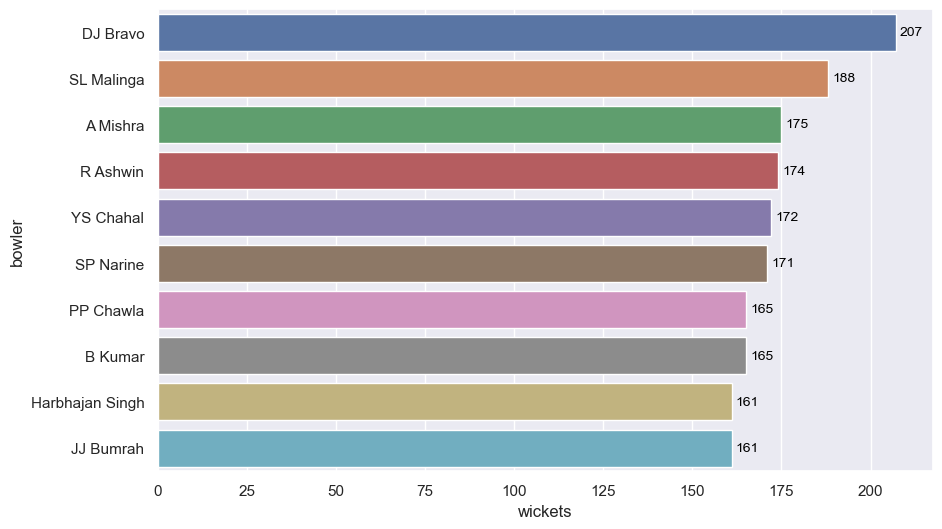

In [154]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=most_wickets_bowler,x="wickets",y="bowler",orient="h")
ax.bar_label(ax.containers[0],label_type='edge',color='black', fontsize=10, padding=3)
plt.show()

### 3.2.2 Lowest economy rate for bowlers more than 100 overs

In [190]:
bowler_data=main_dataframe[['bowler', 'runs_off_bat', 'extras', 'wides', 'no_balls', 'byes', 'leg_byes', 'wickets']]

In [191]:
bowler_data

,bowler,runs_off_bat,extras,wides,no_balls,byes,leg_byes,wickets
0,P Kumar,0,1,0.0,0.0,0.0,1.0,0
1,P Kumar,0,0,0.0,0.0,0.0,0.0,0
2,P Kumar,0,1,1.0,0.0,0.0,0.0,0
3,P Kumar,0,0,0.0,0.0,0.0,0.0,0
4,P Kumar,0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
228,R Ashwin,1,0,0.0,0.0,0.0,0.0,0
229,R Ashwin,0,0,0.0,0.0,0.0,0.0,0
230,R Ashwin,1,0,0.0,0.0,0.0,0.0,0
231,R Ashwin,2,0,0.0,0.0,0.0,0.0,0


In [192]:
bowler_data['fair_deilvery']=bowler_data[['wides','no_balls']].apply(lambda x : 1 if (x.wides==0 and x.no_balls==0) else 0, axis=1)

C:\Users\khyat\AppData\Local\Temp\ipykernel_41220\1239451414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowler_data['fair_deilvery']=bowler_data[['wides','no_balls']].apply(lambda x : 1 if (x.wides==0 and x.no_balls==0) else 0, axis=1)


In [193]:
bowler_data

,bowler,runs_off_bat,extras,wides,no_balls,byes,leg_byes,wickets,fair_deilvery
0,P Kumar,0,1,0.0,0.0,0.0,1.0,0,1
1,P Kumar,0,0,0.0,0.0,0.0,0.0,0,1
2,P Kumar,0,1,1.0,0.0,0.0,0.0,0,0
3,P Kumar,0,0,0.0,0.0,0.0,0.0,0,1
4,P Kumar,0,0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
228,R Ashwin,1,0,0.0,0.0,0.0,0.0,0,1
229,R Ashwin,0,0,0.0,0.0,0.0,0.0,0,1
230,R Ashwin,1,0,0.0,0.0,0.0,0.0,0,1
231,R Ashwin,2,0,0.0,0.0,0.0,0.0,0,1


In [194]:
bowler_data['runs_given']=bowler_data[['runs_off_bat','extras','byes','leg_byes']].apply(lambda x : (x.runs_off_bat+x.extras) if (x.byes==0 and x.leg_byes==0) else 0,axis=1)

C:\Users\khyat\AppData\Local\Temp\ipykernel_41220\3921062560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowler_data['runs_given']=bowler_data[['runs_off_bat','extras','byes','leg_byes']].apply(lambda x : (x.runs_off_bat+x.extras) if (x.byes==0 and x.leg_byes==0) else 0,axis=1)


In [195]:
bowler_data.head()

,bowler,runs_off_bat,extras,wides,no_balls,byes,leg_byes,wickets,fair_deilvery,runs_given
0,P Kumar,0,1,0.0,0.0,0.0,1.0,0,1,0.0
1,P Kumar,0,0,0.0,0.0,0.0,0.0,0,1,0.0
2,P Kumar,0,1,1.0,0.0,0.0,0.0,0,0,1.0
3,P Kumar,0,0,0.0,0.0,0.0,0.0,0,1,0.0
4,P Kumar,0,0,0.0,0.0,0.0,0.0,0,1,0.0


In [196]:
bowler_economy_data = bowler_data[['bowler','fair_deilvery','runs_given']].groupby('bowler',as_index=False).sum(numeric_only=True)

In [198]:
bowler_economy_data['overs_bowled']=bowler_economy_data['fair_deilvery'].apply(lambda x: x/6)

In [213]:
bowler_economy_data['economy'] = bowler_economy_data[['overs_bowled','runs_given']].apply(lambda x : round(x.runs_given/x.overs_bowled,2),axis=1)

In [215]:
bowler_economy_data_100=bowler_economy_data[bowler_economy_data.overs_bowled>100]

In [216]:
bowler_economy_data_100=bowler_economy_data_100.sort_values(by="economy",ascending=True).head(10)

In [217]:
bowler_economy_data_100

,bowler,fair_deilvery,runs_given,overs_bowled,economy
356,Rashid Khan,2208,2348.0,368.000000,6.38
6,A Kumble,965,1058.0,160.833333,6.58
402,SP Narine,3463,3831.0,577.166667,6.64
243,M Muralitharan,1528,1706.0,254.666667,6.70
120,DL Vettori,777,879.0,129.500000,6.79
163,J Botha,694,800.0,115.666667,6.92
128,DW Steyn,2182,2523.0,363.666667,6.94
318,R Ashwin,3900,4534.0,650.000000,6.98
329,R Sharma,928,1086.0,154.666667,7.02
149,Harbhajan Singh,3416,4030.0,569.333333,7.08


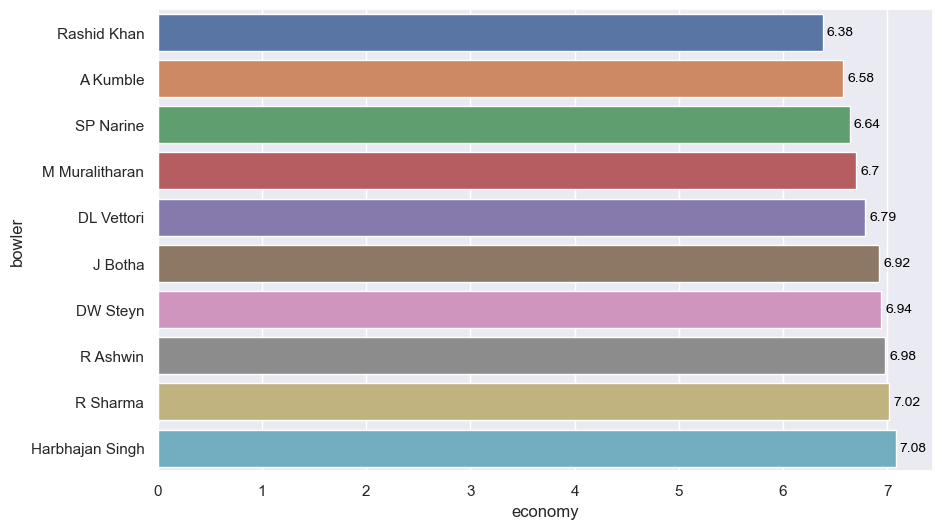

In [218]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=bowler_economy_data_100,x="economy",y="bowler",orient="h")
ax.bar_label(ax.containers[0],label_type='edge',color='black', fontsize=10, padding=3)
plt.show()